In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_csv('Downloads/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
#check null values

df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

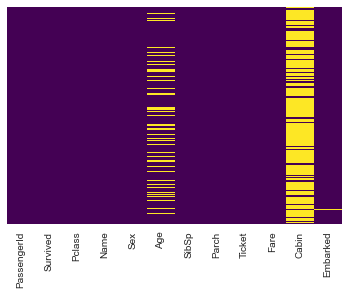

In [38]:
#better way of finding which column has null values

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Sex', ylabel='count'>

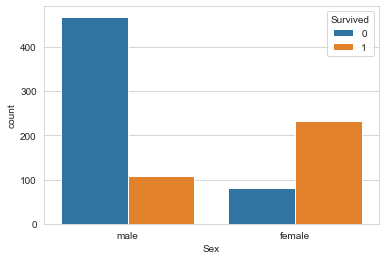

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=df, hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

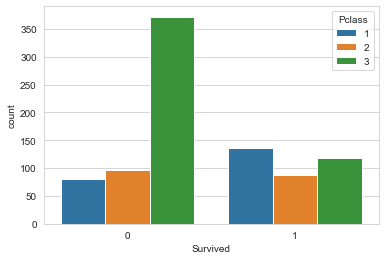

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df, hue='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

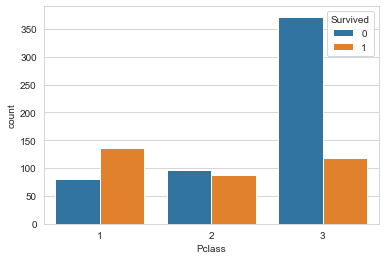

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass',data=df, hue='Survived')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

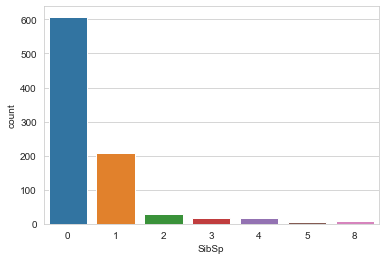

In [42]:
sns.set_style('whitegrid')
sns.countplot(x='SibSp',data=df)

/home/arpit/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

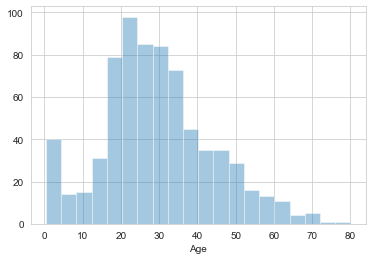

In [43]:
sns.distplot(df['Age'].dropna(),kde=False)

# Data Cleaning

## Box Plot gives relation between Pclass and age

### P1 class has an average age of 37, P2 has 28, P3 has 25

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

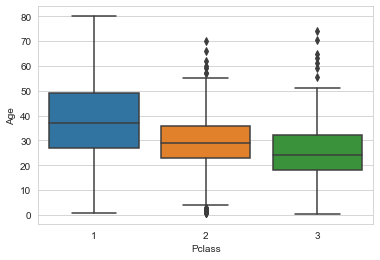

In [44]:
sns.boxplot(x='Pclass', y='Age', data = df)

In [45]:
def impute_ages(cols):
    Age = cols[0]
    Pclass = cols[1]
    #replacing null values in age column with repective mean values for each Pclass
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 28
        else:
            return 25
    else:
        return Age

In [46]:
df['Age'] = df[['Age','Pclass']].apply(impute_ages, axis=1)

Check heatmap again for null values in Age column

<AxesSubplot:>

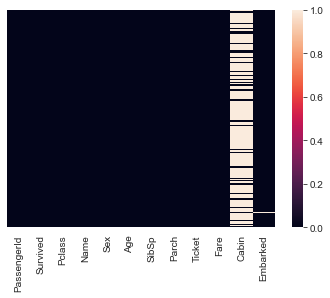

In [47]:
sns.heatmap(df.isnull(), yticklabels=False)

Dropping Cabin column and row that is Nan in Embarked column

In [48]:
df.drop(columns='Cabin', inplace=True)
df.dropna(inplace=True)

<AxesSubplot:>

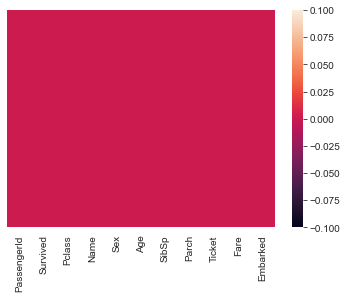

In [49]:
sns.heatmap(df.isnull(), yticklabels=False)

### Converting Categorical features

##### We will need to convert categorical features to dummy variables, Otherwise ML algo. won't be able to take those values as inputs

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [59]:
pd.get_dummies(df['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


We can drop C because C can be represented by other two features Q and S.
00 will represent C

In [60]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [62]:
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [65]:
sex = pd.get_dummies(df['Sex'], drop_first=True)

Dropping columns which are not required

In [66]:
df.drop(columns=['Name','Sex','Embarked','Ticket'],inplace=True)

In [67]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


Adding categorical features to df

In [70]:
df = pd.concat([df,sex,embark],axis='columns')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,25.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0
